<a href="https://colab.research.google.com/github/harshitha-0531/Digit-recognizer/blob/main/Day8_ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pandas and numpy and tenserflow and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers # Import models and layers here
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from tensorflow.keras.datasets import cifar100

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
# normalise [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# one hot encode
num_classes=100
num_classes = 100
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)
print(y_train_cat.shape)

(50000, 32, 32, 3)
(50000, 100)


In [5]:
# model building
ann = models.Sequential()
ann.add(layers.Flatten(input_shape=(32,32,3)))
ann.add(layers.Dense(1024, activation='relu'))
ann.add(layers.Dropout(0.5))
ann.add(layers.Dense(512, activation='relu'))
ann.add(layers.Dropout(0.4))
ann.add(layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
keras.callbacks.ModelCheckpoint('ann_cifar100.h5', save_best_only=True)
]
history_ann = ann.fit(x_train, y_train_cat,
validation_split=0.1,
epochs=5,
batch_size=128,
callbacks=callbacks)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0197 - loss: 4.6213

352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.0197 - loss: 4.6208 - val_accuracy: 0.0460 - val_loss: 4.2575
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0389 - loss: 4.2938

352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.0389 - loss: 4.2938 - val_accuracy: 0.0742 - val_loss: 4.1331
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0486 - loss: 4.2017

352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.0486 - loss: 4.2017 - val_accuracy: 0.0770 - val_loss: 4.0930
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0512 - loss: 4.1690

352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.0512 - loss: 4.1690 - val_accuracy: 0.0750 - val_loss: 4.0562
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0573 - loss: 4.1284

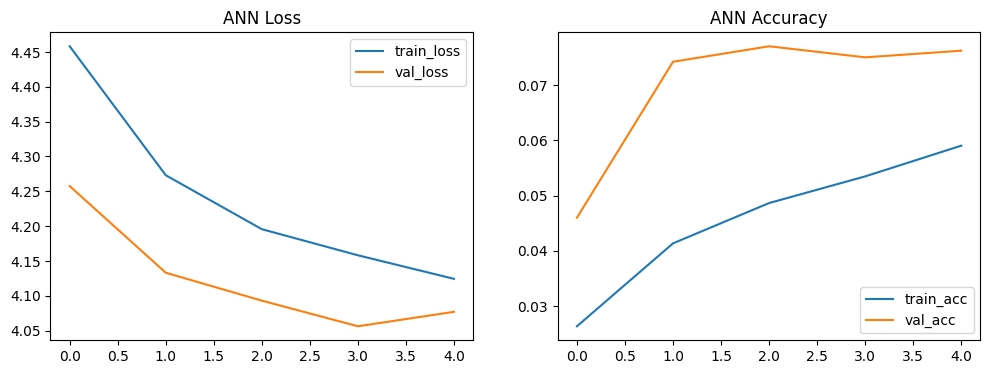

313/313 - 6s - 19ms/step - accuracy: 0.0815 - loss: 4.0400
ANN Test loss: 4.04003381729126
ANN Test accuracy: 0.08150000125169754


In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_ann.history['loss'], label='train_loss')
plt.plot(history_ann.history['val_loss'], label='val_loss')
plt.title('ANN Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_ann.history['accuracy'], label='train_acc')
plt.plot(history_ann.history['val_accuracy'], label='val_acc')
plt.title('ANN Accuracy')
plt.legend()
plt.show()

# evalute
ann_loss, ann_acc = ann.evaluate(x_test, y_test_cat, verbose=2)
print('ANN Test loss:', ann_loss)
print('ANN Test accuracy:', ann_acc)

In [10]:
# cnn model
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.25))


cnn.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.3))


cnn.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.35))


cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [
keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
keras.callbacks.ModelCheckpoint('cnn_cifar100.h5', save_best_only=True)
]


history_cnn = cnn.fit(x_train, y_train_cat,
validation_split=0.1,
epochs=3,
batch_size=128,
callbacks=callbacks)

Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.0399 - loss: 4.6316

352/352 ━━━━━━━━━━━━━━━━━━━━ 304s 850ms/step - accuracy: 0.0400 - loss: 4.6306 - val_accuracy: 0.0194 - val_loss: 7.4600
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.1117 - loss: 3.8386

352/352 ━━━━━━━━━━━━━━━━━━━━ 329s 872ms/step - accuracy: 0.1118 - loss: 3.8384 - val_accuracy: 0.1798 - val_loss: 3.5623
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.1568 - loss: 3.5211

352/352 ━━━━━━━━━━━━━━━━━━━━ 321s 870ms/step - accuracy: 0.1569 - loss: 3.5210 - val_accuracy: 0.2464 - val_loss: 3.0306


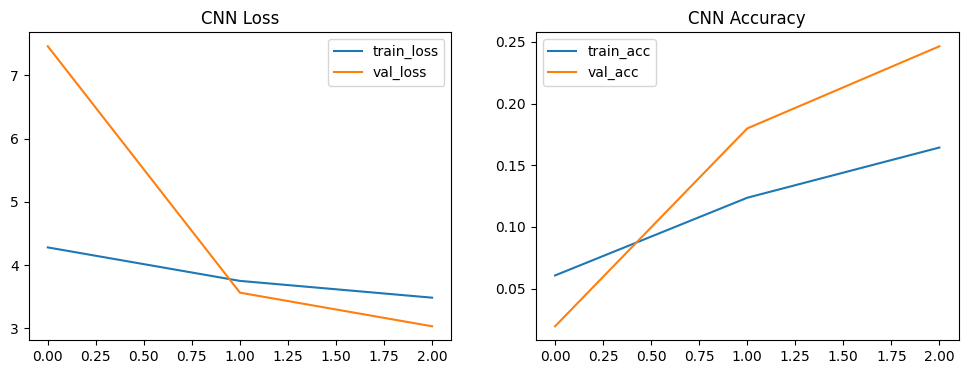

313/313 - 15s - 49ms/step - accuracy: 0.2551 - loss: 3.0094
CNN Test loss: 3.0094120502471924
CNN Test accuracy: 0.2551000118255615


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy')
plt.legend()
plt.show()


# Evaluate CNN
cnn_loss, cnn_acc = cnn.evaluate(x_test, y_test_cat, verbose=2)
print('CNN Test loss:', cnn_loss)
print('CNN Test accuracy:', cnn_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step

Classification report (first 20 classes):
              precision    recall  f1-score   support

           0       0.39      0.57      0.46       100
           1       0.27      0.30      0.28       100
           2       0.17      0.26      0.21       100
           3       0.09      0.10      0.09       100
           4       0.00      0.00      0.00       100
           5       0.30      0.24      0.27       100
           6       0.26      0.12      0.16       100
           7       0.29      0.20      0.24       100
           8       0.28      0.45      0.34       100
           9       0.35      0.35      0.35       100
          10       0.20      0.01      0.02       100
          11       0.09      0.07      0.08       100
          12       0.25      0.45      0.32       100
          13       0.23      0.42      0.29       100
          14       0.19      0.11      0.14       100
          15       0.30      0.14      0.19      

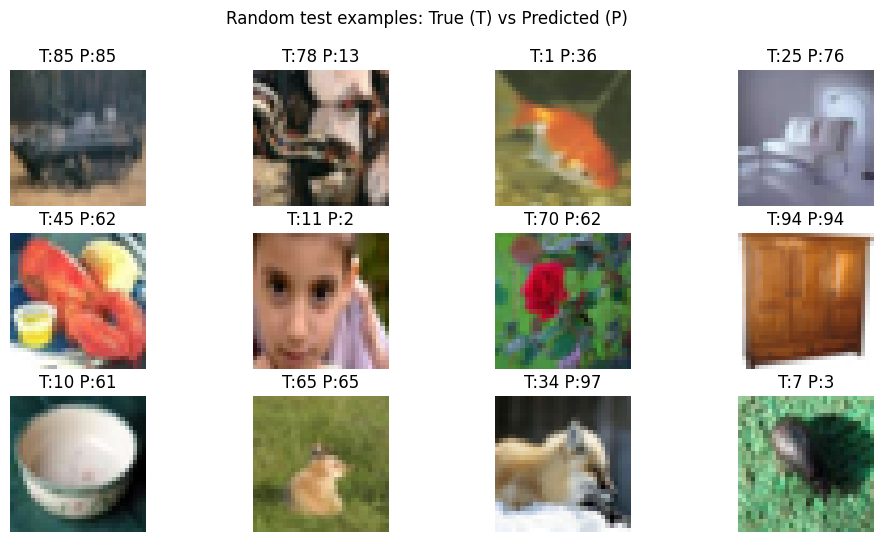

In [12]:
# predicted
y_pred_prob = cnn.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.reshape(-1)


print("\nClassification report (first 20 classes):")
print(classification_report(y_true, y_pred, labels=list(range(20)), zero_division=0))


# random predictions
idx = np.random.choice(len(x_test), 12, replace=False)
plt.figure(figsize=(12,6))
for i, j in enumerate(idx):
  plt.subplot(3,4,i+1)
  plt.imshow(x_test[j])
  plt.axis('off')
  plt.title(f'T:{y_true[j]} P:{y_pred[j]}')
plt.suptitle('Random test examples: True (T) vs Predicted (P)')
plt.show()